# Global Happiness

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
%matplotlib inline 
df=pd.read_csv('Happiness-Data.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


# Identify any missing values in the data


In [10]:
df.isna().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [11]:
#Dropping the Categorical data and creating dfNumerical dataframe
dfNumerical = df.drop(labels=['Country name', 'Regional indicator'], axis=1)
dfNumerical.head()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [12]:
# Data Standardization using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dfNumerical)

# statistics of scaled data
pd.DataFrame(data_scaled, columns=dfNumerical.columns).describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,149.0,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02
mean,-4.023627e-16,6.624082e-16,2.980464e-18,-1.001436e-15,-8.971198e-16,7.242529e-16,1.296502e-15,-7.600184e-16,-2.682418e-17,-5.737394e-16,0.0,4.470697e-17,-1.907497e-16,-1.639255e-17,-3.218902e-16,3.047525e-16,1.326307e-16,-8.404910e-16
std,1.003373e+00,1.003373e+00,1.003373e+00,1.003373e+00,1.003373e+00,1.003373e+00,1.003373e+00,1.003373e+00,1.003373e+00,1.003373e+00,0.0,1.003373e+00,1.003373e+00,1.003373e+00,1.003373e+00,1.003373e+00,1.003373e+00,1.003373e+00
min,-2.812109e+00,-1.493652e+00,-2.904500e+00,-2.720523e+00,-2.422440e+00,-3.071932e+00,-2.450516e+00,-3.626333e+00,-1.817284e+00,-3.613457e+00,0.0,-2.422436e+00,-3.074853e+00,-2.450087e+00,-3.628974e+00,-1.817919e+00,-1.185686e+00,-3.326246e+00
25%,-6.361116e-01,-7.183610e-01,-6.252528e-01,-6.521551e-01,-7.718045e-01,-5.654442e-01,-7.702266e-01,-6.515872e-01,-7.383654e-01,-3.384187e-01,0.0,-7.713855e-01,-5.671117e-01,-7.685291e-01,-6.528032e-01,-7.458339e-01,-6.592642e-01,-5.455546e-01
50%,1.084798e-03,-2.167020e-01,-2.189477e-02,-4.243840e-03,1.184646e-01,1.506952e-01,2.389266e-01,1.098060e-01,-1.389659e-01,2.997938e-01,0.0,1.185953e-01,1.499395e-01,2.394639e-01,1.112505e-01,-1.434243e-01,-2.995424e-01,1.468189e-01
75%,6.747191e-01,5.129838e-01,6.623552e-01,6.509988e-01,8.563142e-01,7.882340e-01,6.836307e-01,7.561049e-01,6.269334e-01,6.580886e-01,0.0,8.573538e-01,7.855958e-01,6.822272e-01,7.588770e-01,6.223505e-01,3.409378e-01,6.786961e-01
max,2.157462e+00,5.210336e+00,2.146959e+00,2.164930e+00,1.918055e+00,1.469440e+00,1.774691e+00,1.579472e+00,3.710511e+00,1.184334e+00,0.0,1.918389e+00,1.467763e+00,1.775005e+00,1.581144e+00,3.705871e+00,3.613528e+00,1.962666e+00


In [13]:
#Dropping redundant Data Columns from dfNumerical
dfNumerical = dfNumerical.drop(labels=['upperwhisker', 'lowerwhisker', 'Ladder score in Dystopia', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption'], axis=1)

In [14]:
dfNumerical.head()

,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,7.842,0.032,10.775,0.954,72.0,0.949,-0.098,0.186,3.253
1,7.620,0.035,10.933,0.954,72.7,0.946,0.030,0.179,2.868
2,7.571,0.036,11.117,0.942,74.4,0.919,0.025,0.292,2.839
3,7.554,0.059,10.878,0.983,73.0,0.955,0.160,0.673,2.967
4,7.464,0.027,10.932,0.942,72.4,0.913,0.175,0.338,2.798


# Identification of Outliers via Box Plots

In [15]:
dfNumerical.columns

Index(['Ladder score', 'Standard error of ladder score',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

In [16]:
features = ['Ladder score', 'Standard error of ladder score',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual']

In [17]:
list(enumerate(features))

[(0, 'Ladder score'),
 (1, 'Standard error of ladder score'),
 (2, 'Logged GDP per capita'),
 (3, 'Social support'),
 (4, 'Healthy life expectancy'),
 (5, 'Freedom to make life choices'),
 (6, 'Generosity'),
 (7, 'Perceptions of corruption'),
 (8, 'Dystopia + residual')]

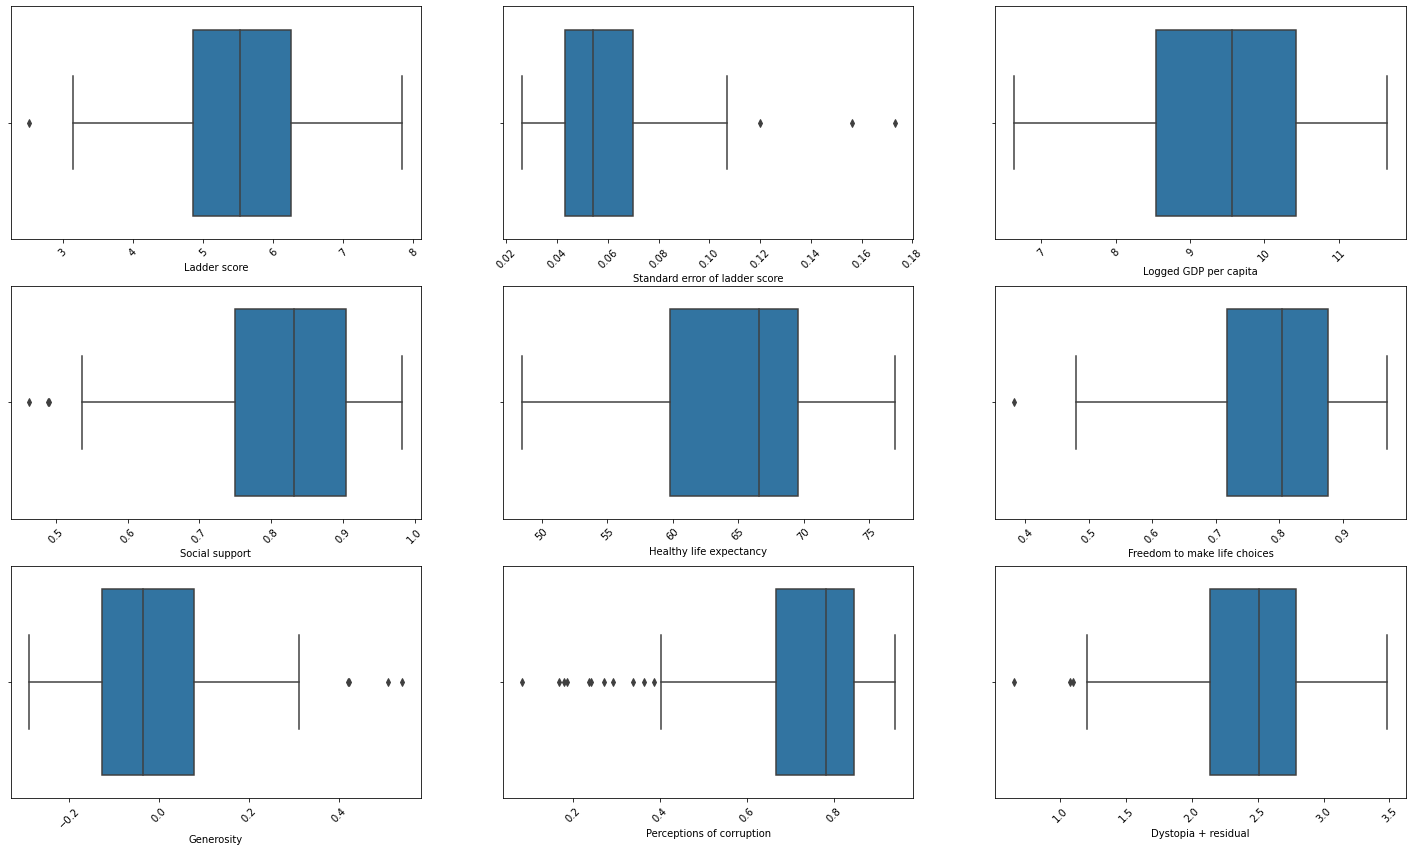

In [18]:
plt.figure(figsize = (25 ,30))
for i in enumerate(features):
    plt.subplot(6, 3, i[0]+1)
    sns.boxplot(x = i[1], data=dfNumerical)
    plt.xticks(rotation = 45)

# Data Normalisation

In [19]:
from sklearn.preprocessing import normalize
data_scaled = normalize(dfNumerical)
data_scaled = pd.DataFrame(data_scaled, columns=dfNumerical.columns)
datasc=data_scaled.copy()
data_scaled.head()

,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,0.106974,0.000437,0.146983,0.013014,0.982160,0.012945,-0.001337,0.002537,0.044375
1,0.103002,0.000473,0.147784,0.012895,0.982706,0.012787,0.000406,0.002420,0.038768
2,0.100051,0.000476,0.146912,0.012449,0.983200,0.012145,0.000330,0.003859,0.037518
3,0.101714,0.000794,0.146472,0.013236,0.982943,0.012859,0.002154,0.009062,0.039951
4,0.101322,0.000367,0.148400,0.012787,0.982815,0.012394,0.002376,0.004588,0.037982


# Dimensionality Reduction Using PCA

In [23]:
#Using the original numerical Dataframe
dfNumerical.head()

,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,7.842,0.032,10.775,0.954,72.0,0.949,-0.098,0.186,3.253
1,7.620,0.035,10.933,0.954,72.7,0.946,0.030,0.179,2.868
2,7.571,0.036,11.117,0.942,74.4,0.919,0.025,0.292,2.839
3,7.554,0.059,10.878,0.983,73.0,0.955,0.160,0.673,2.967
4,7.464,0.027,10.932,0.942,72.4,0.913,0.175,0.338,2.798


In [25]:
# Using Normalizer on dfNumerical as Normalize method doesnt provide fit/transform/fit_transform
from sklearn import preprocessing
T = preprocessing.Normalizer().fit_transform(dfNumerical)

([<matplotlib.axis.XTick at 0x7f9899c82df0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

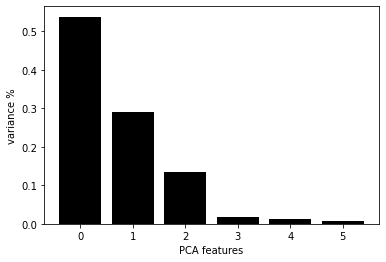

In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Create a PCA instance: pca
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(T)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [28]:
#Finding out the Cluster

# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)
PCA_components

,0,1,2,3,4,5
0,0.024048,0.001466,-0.010168,-0.003078,0.003338,0.001153
1,0.018191,0.005036,-0.010910,-0.001308,0.003805,0.000629
2,0.014815,0.004731,-0.009872,-0.001197,0.003011,-0.000045
3,0.017202,0.002655,-0.007782,0.002165,-0.000733,-0.000616
4,0.016573,0.005640,-0.009437,0.000969,0.003038,-0.000559
...,...,...,...,...,...,...
144,-0.004921,0.013276,0.017580,0.001029,-0.002647,0.003085
145,-0.028094,0.029632,0.009840,-0.000798,-0.000447,0.003534
146,-0.038786,-0.005554,-0.008109,-0.000659,0.007607,0.004243
147,-0.031958,0.004680,0.006016,0.000784,-0.000799,0.001133


# Finding ideal number of clusters

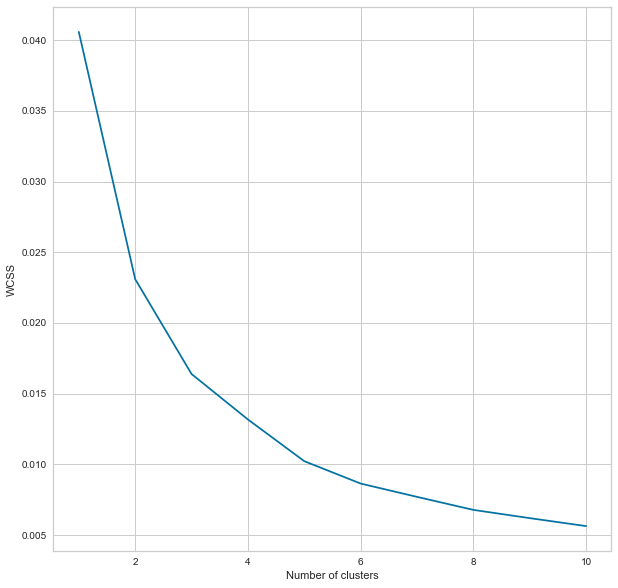

In [36]:
# Using Elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(PCA_components.iloc[:,:2])
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
model.inertia_

0.00563133432780191

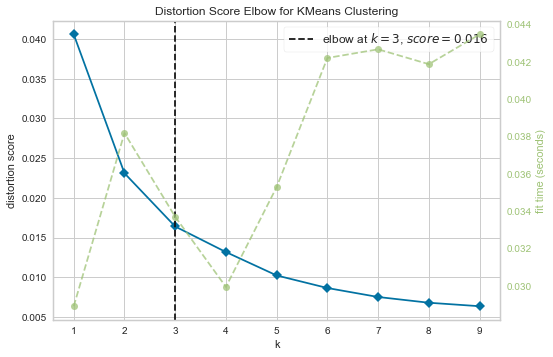

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
# Using YellowBrick method
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(PCA_components.iloc[:,:2])
visualizer.show()


# Performing K-Means

In [39]:
# Clustering using KMeans with n_clusters = 3 based on YellowBrick and Elbow methods
import numpy as np
model = KMeans(n_clusters = 3, init = "k-means++")
label = model.fit_predict(PCA_components.iloc[:,:2])
centers = np.array(model.cluster_centers_)
uniq = np.unique(label)

In [40]:
# colors for plotting
colors = ['red', 'green', 'orange']
# assign a color to each features (note that we are using features as target)
features_colors = [ colors[label[i]] for i in range(len(PCA_components.iloc[:,:2])) ]
T = PCA_components.iloc[:,:2]

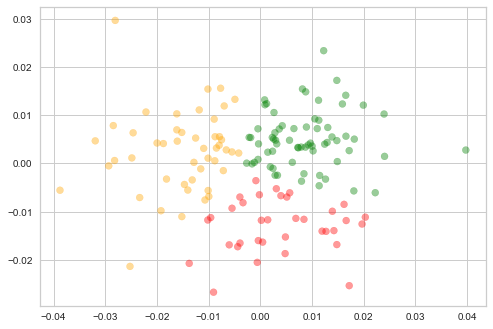

In [41]:
# plot the PCA cluster components
plt.scatter(T[0], T[1],
            c=features_colors, marker='o',
            alpha=0.4
        )

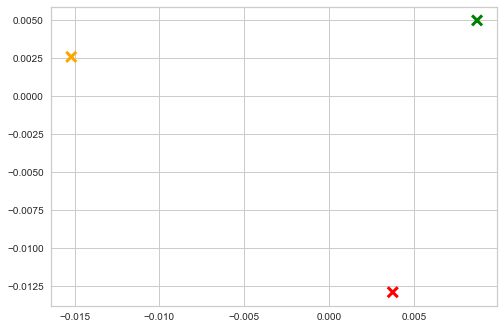

In [42]:
# plot the centroids
plt.scatter(centers[:, 0], centers[:, 1],
            marker='x', s=100,
            linewidths=3, c=colors
        )

In [43]:
# store the values of PCA component in variable: for easy writing
xvector =  pca.components_[0] * max(T[0])
yvector =  pca.components_[1] * max(T[1])
columns = dfNumerical.columns

# Projecting original features on the PC axis in the multidimensional scaling

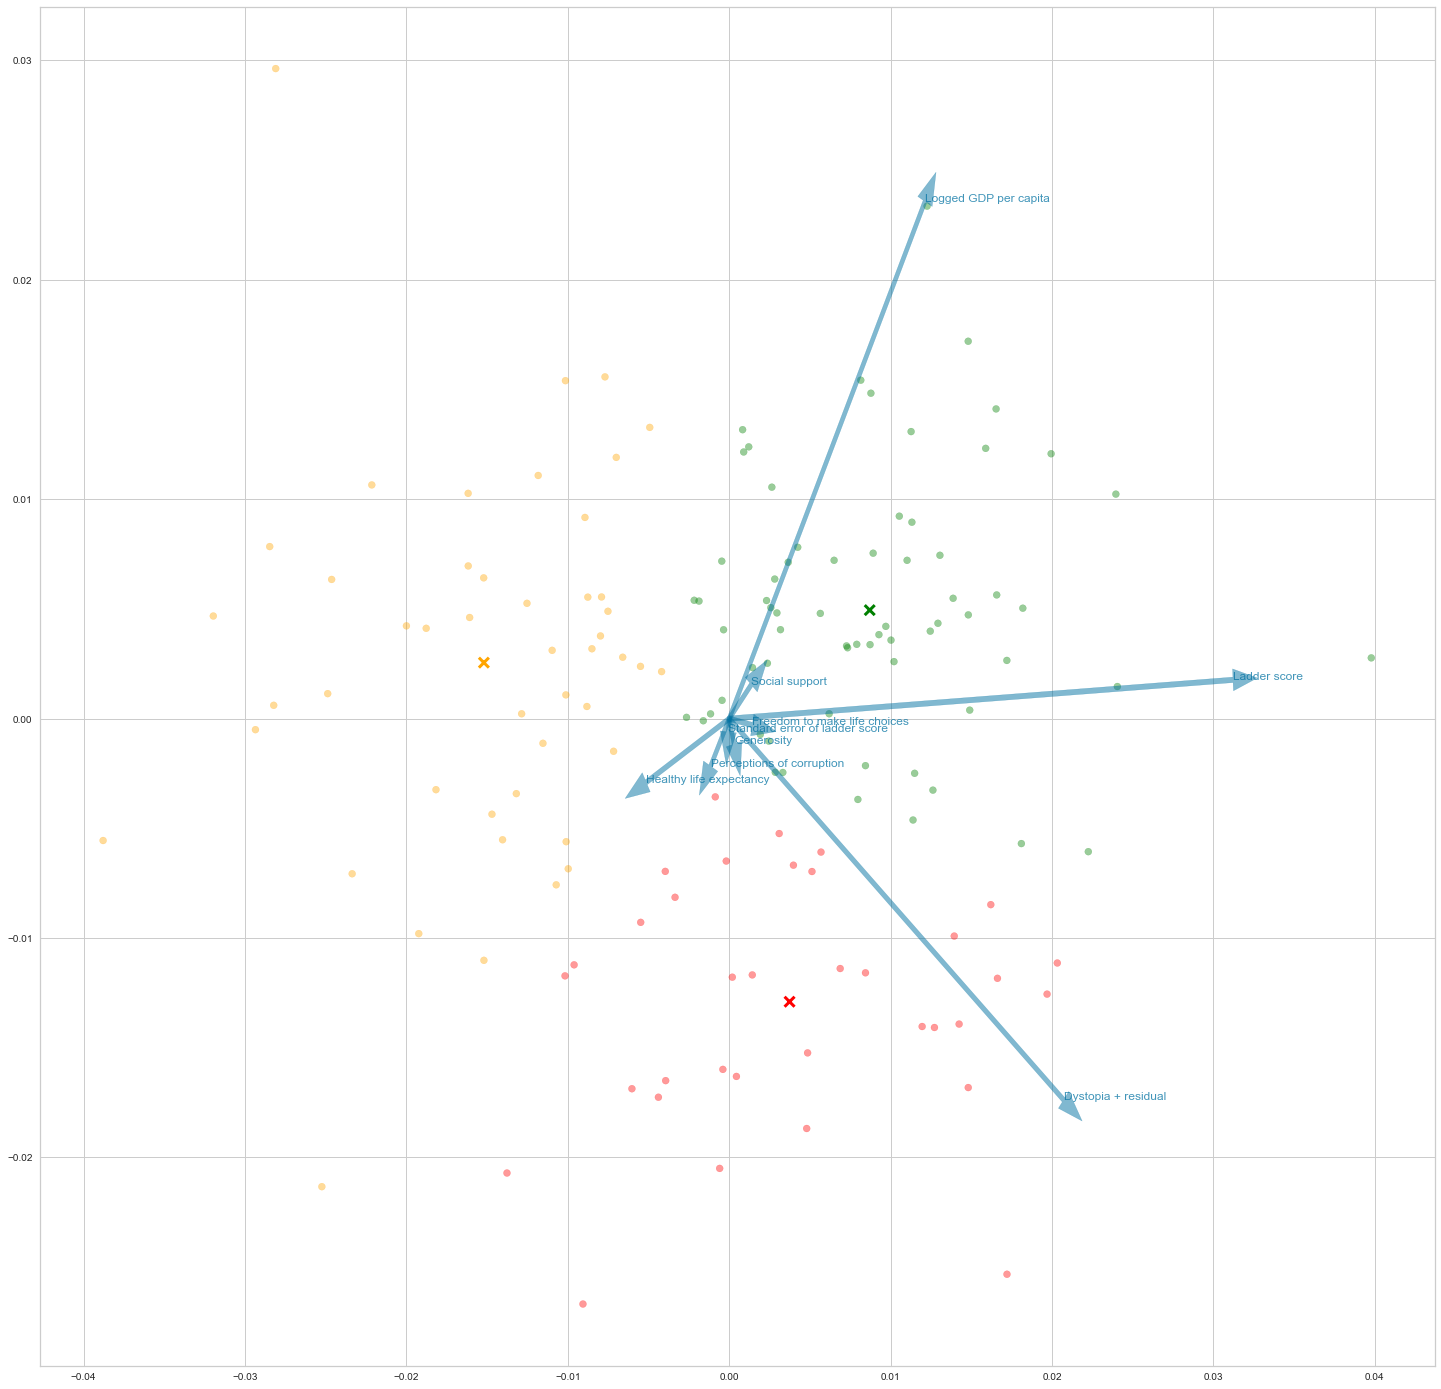

In [44]:
# plot the 'name of individual features' along with vector length
plt.figure(figsize=(25,25))
for i in range(len(columns)):
    # plot arrows
    plt.arrow(0, 0, xvector[i], yvector[i],
                color='b', width=0.00025,
                head_width=0.001, alpha=0.5
            )
    # plot name of features
    plt.text(xvector[i], yvector[i], list(columns)[i], color='b', alpha=0.75)

plt.scatter(T[0], T[1], 
            c=features_colors, marker='o',
            alpha=0.4)

#plot the centroids
plt.scatter(centers[:, 0], centers[:, 1],
            marker='x', s=100,
            linewidths=3, c=colors )            
plt.show()

# Agglomerative clustering hierarchical clustering after performing dimensionality reduction (PCA)

In [55]:
dfNumerical.head()

,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,7.842,0.032,10.775,0.954,72.0,0.949,-0.098,0.186,3.253
1,7.620,0.035,10.933,0.954,72.7,0.946,0.030,0.179,2.868
2,7.571,0.036,11.117,0.942,74.4,0.919,0.025,0.292,2.839
3,7.554,0.059,10.878,0.983,73.0,0.955,0.160,0.673,2.967
4,7.464,0.027,10.932,0.942,72.4,0.913,0.175,0.338,2.798


# Ploting Dendrogram

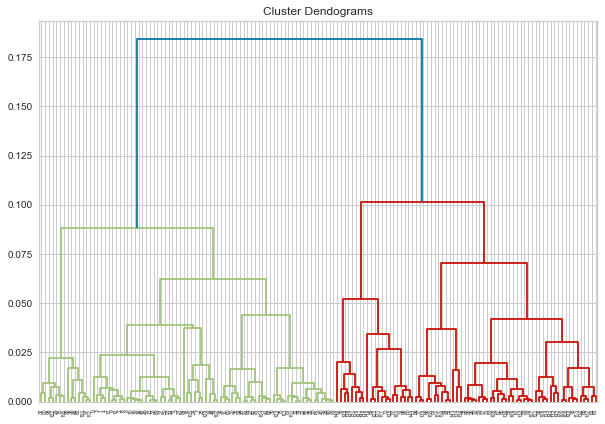

In [50]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Cluster Dendograms")
dend = shc.dendrogram(shc.linkage(T, method='ward'))

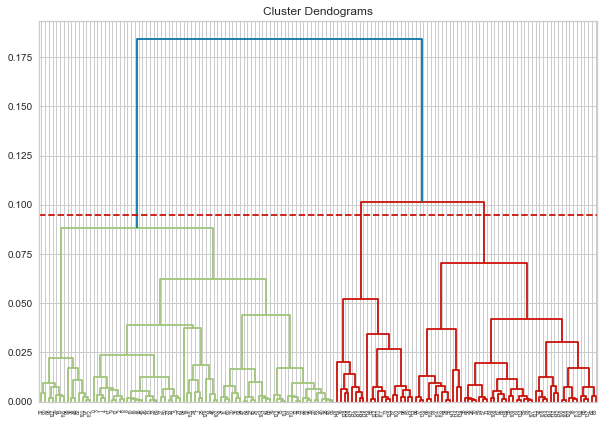

In [54]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Cluster Dendograms")
dend = shc.dendrogram(shc.linkage(T, method='ward'))
plt.axhline(y=0.095, color='r', linestyle='--')

In [56]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(T)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 1, 0, 1, 1, 2,
       2, 1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2])

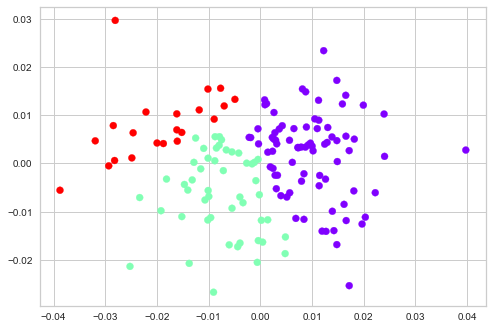

In [64]:
plt.figure(figsize=(6, 5))  
plt.scatter(T[0], T[1], c=cluster.labels_, cmap='rainbow') 

# Projecting original features on the PC axis in the multidimensional scaling

In [65]:
# store the values of PCA component in variable: for easy writing
xvector =  pca.components_[0] * max(T[0])
yvector =  pca.components_[1] * max(T[1])
columns = dfNumerical.columns

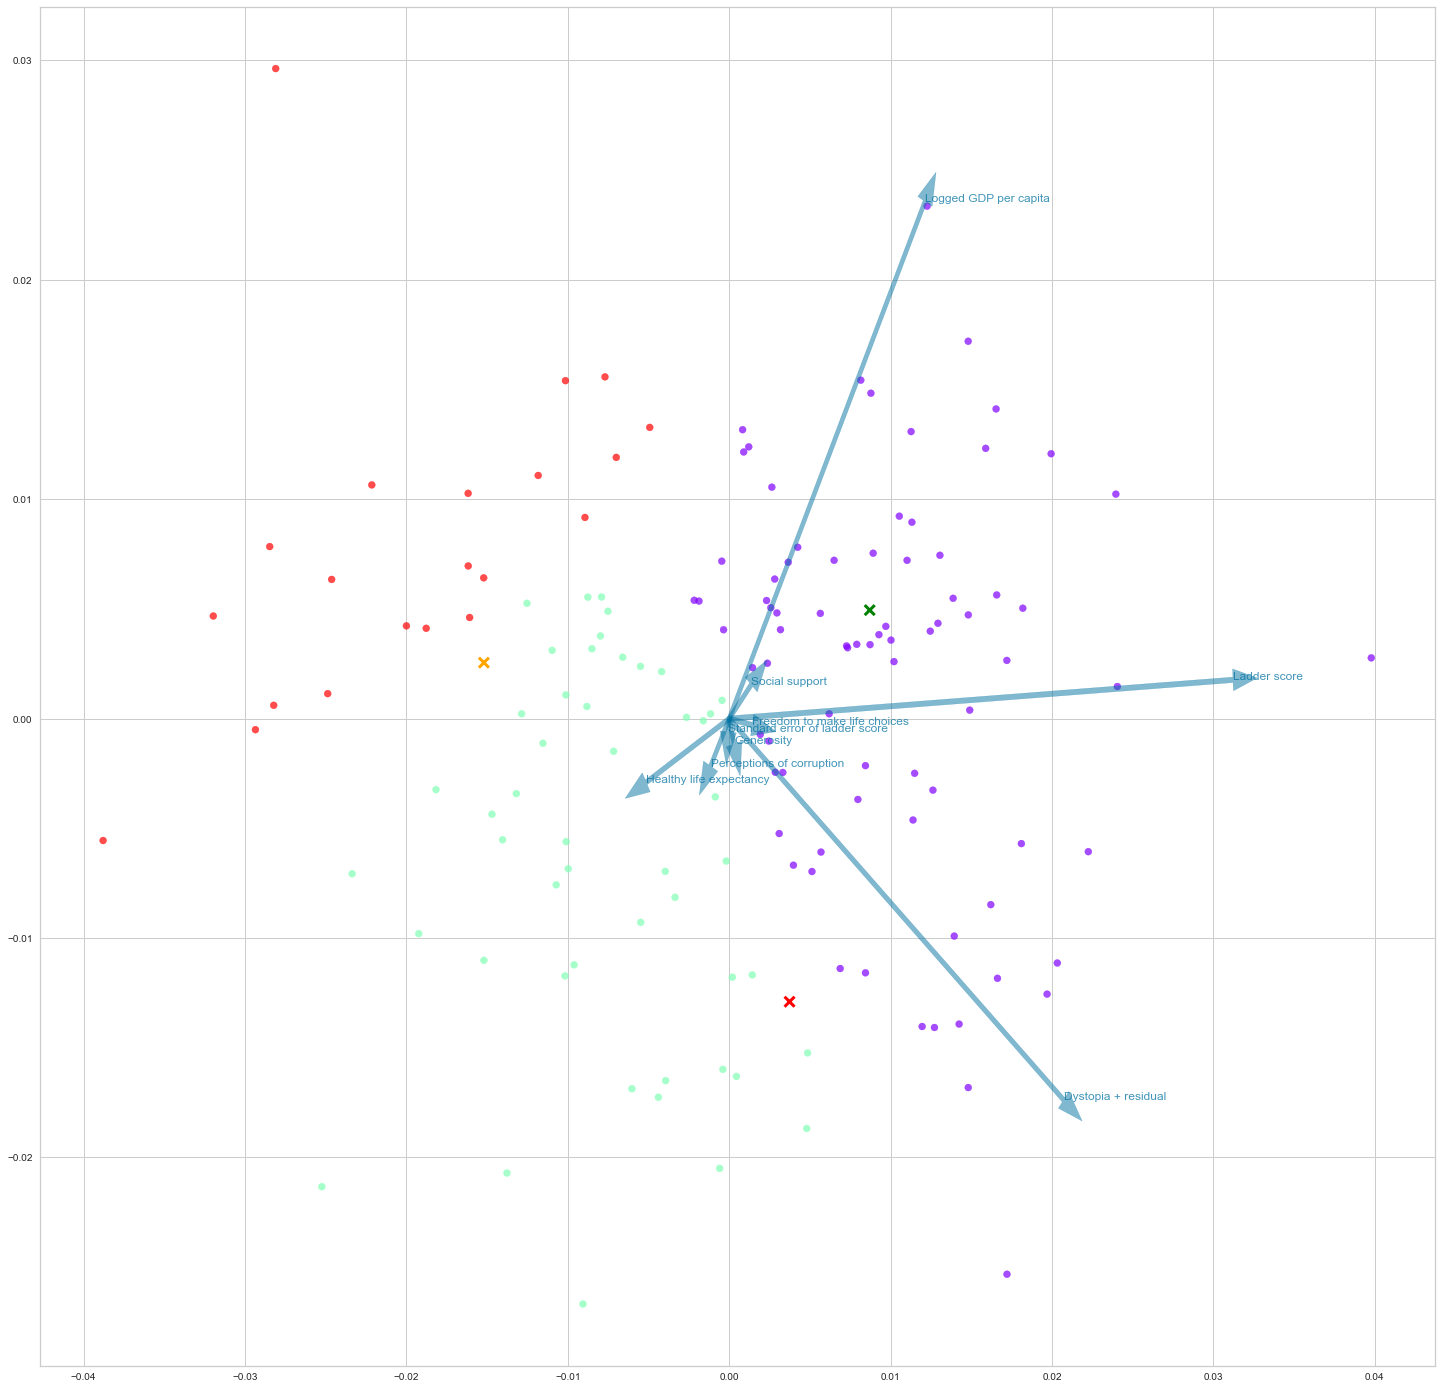

In [69]:
# plot the 'name of individual features' along with vector length
plt.figure(figsize=(25,25))
for i in range(len(columns)):
    # plot arrows
    plt.arrow(0, 0, xvector[i], yvector[i],
                color='b', width=0.00025,
                head_width=0.001, alpha=0.5
            )
    # plot name of features
    plt.text(xvector[i], yvector[i], list(columns)[i], color='b', alpha=0.75)

plt.scatter(T[0], T[1], 
            c=cluster.labels_, marker='o', cmap='rainbow',
            alpha=0.7)

#plot the centroids
plt.scatter(centers[:, 0], centers[:, 1],
            marker='x', s=100,
            linewidths=3, c=colors )            
plt.show()